In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
df_train = pd.read_csv(r'/home/srija/Documents/train.csv')

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train.Gender.value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [7]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [9]:
df_train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [13]:
df_train.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
df_train.dropna(inplace=True)

In [15]:
df_train.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df_train_dummied = pd.get_dummies(df_train,columns=['Gender'])
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [17]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

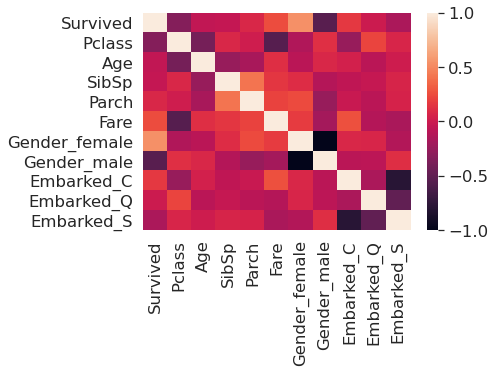

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [19]:
used_features = ["Pclass","Age","SibSp","Parch","Gender_female","Gender_male","Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [22]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

/home/srija/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = LogReg.predict(X_test)

#compute the confusion matrix to evaluate the accuracy of classification
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]])

In [26]:
#to obtain accuracy
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [24]:
len(X_test)

267

In [25]:
#computing other performance measures from the confusion matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [26]:
LogReg.coef_

array([[-1.03971355, -0.03977658, -0.24280203, -0.04041655,  1.18654252,
        -1.20304782,  0.34372217, -0.04575574, -0.31447173]])

In [27]:
LogReg.intercept_

array([3.65983377])

In [28]:
#we can further check our algorithms predicted probabilities using the X_test

df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Gender_female', 'Gender_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [29]:
LogReg.predict_proba(X_test)

array([[0.26492599, 0.73507401],
       [0.3957436 , 0.6042564 ],
       [0.94715512, 0.05284488],
       [0.26017587, 0.73982413],
       [0.94419882, 0.05580118],
       [0.13502872, 0.86497128],
       [0.33252531, 0.66747469],
       [0.51919548, 0.48080452],
       [0.78211816, 0.21788184],
       [0.40647114, 0.59352886],
       [0.73987799, 0.26012201],
       [0.21172431, 0.78827569],
       [0.74850102, 0.25149898],
       [0.14587213, 0.85412787],
       [0.86435134, 0.13564866],
       [0.36872762, 0.63127238],
       [0.89363937, 0.10636063],
       [0.29704393, 0.70295607],
       [0.17607946, 0.82392054],
       [0.40029205, 0.59970795],
       [0.90462266, 0.09537734],
       [0.55333851, 0.44666149],
       [0.86418945, 0.13581055],
       [0.93756804, 0.06243196],
       [0.51722517, 0.48277483],
       [0.51473809, 0.48526191],
       [0.03932608, 0.96067392],
       [0.86894784, 0.13105216],
       [0.8979147 , 0.1020853 ],
       [0.3258881 , 0.6741119 ],
       [0.

In [30]:
LogReg.predict_proba(X_test).shape

(267, 2)